# Importing Libraries:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

# Reading Data:

In [6]:
df = pd.read_csv('Pakistani_Diabetes_Dataset.csv')

In [7]:
df[:5]

Age  Gender  Rgn     wt    BMI   wst  sys  dia  his   A1c  B.S.R  vision  \
0  60.0       1     0  76.0  29.90  41.0  130   90    0  8.90    278       0   
1  57.0       1     1  64.0  24.30  39.0  120   80    1  8.50    165       0   
2  58.0       0     0  73.0  25.20  34.0  140   90    0  5.65    130       1   
3  27.0       0     1  60.0  22.01  30.0  110   70    0  5.00     95       0   
4  56.0       1     0  70.0  25.80  43.0  125   90    0  8.30    139       1   

   Exr  dipsia  uria   Dur  neph  HDL  Outcome  
0   30       1     0   5.0     0   60        1  
1   20       1     1  20.0     0   42        1  
2   20       0     0   0.0     0   54        0  
3   15       0     0   0.0     0   57        0  
4   40       1     0   5.0     1   53        1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      912 non-null    float64
 1   Gender   912 non-null    int64  
 2   Rgn      912 non-null    int64  
 3   wt       912 non-null    float64
 4   BMI      912 non-null    float64
 5   wst      912 non-null    float64
 6   sys      912 non-null    int64  
 7   dia      912 non-null    int64  
 8   his      912 non-null    int64  
 9   A1c      912 non-null    float64
 10  B.S.R    912 non-null    int64  
 11  vision   912 non-null    int64  
 12  Exr      912 non-null    int64  
 13  dipsia   912 non-null    int64  
 14  uria     912 non-null    int64  
 15  Dur      912 non-null    float64
 16  neph     912 non-null    int64  
 17  HDL      912 non-null    int64  
 18  Outcome  912 non-null    int64  
dtypes: float64(6), int64(13)
memory usage: 135.5 KB


In [9]:
df[['Gender', 'Rgn ', 'his', 'vision', 'dipsia', 'uria', 'neph', 'Outcome']] = df[['Gender', 'Rgn ', 'his', 'vision', 'dipsia', 'uria', 'neph', 'Outcome']].astype('str')

<AxesSubplot:>

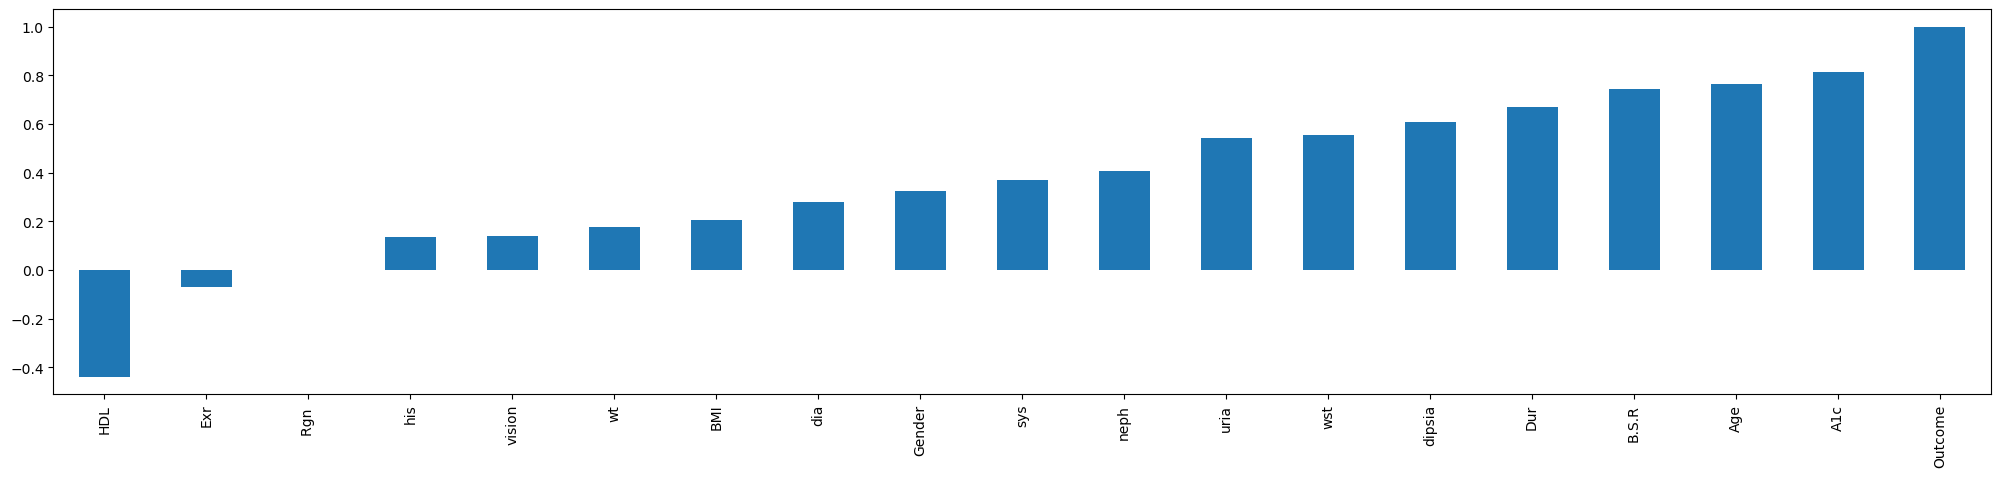

In [10]:
plt.figure(figsize=(25, 5))
df.corr()['Outcome'].sort_values().plot(kind='bar')

<Figure size 2500x500 with 0 Axes>

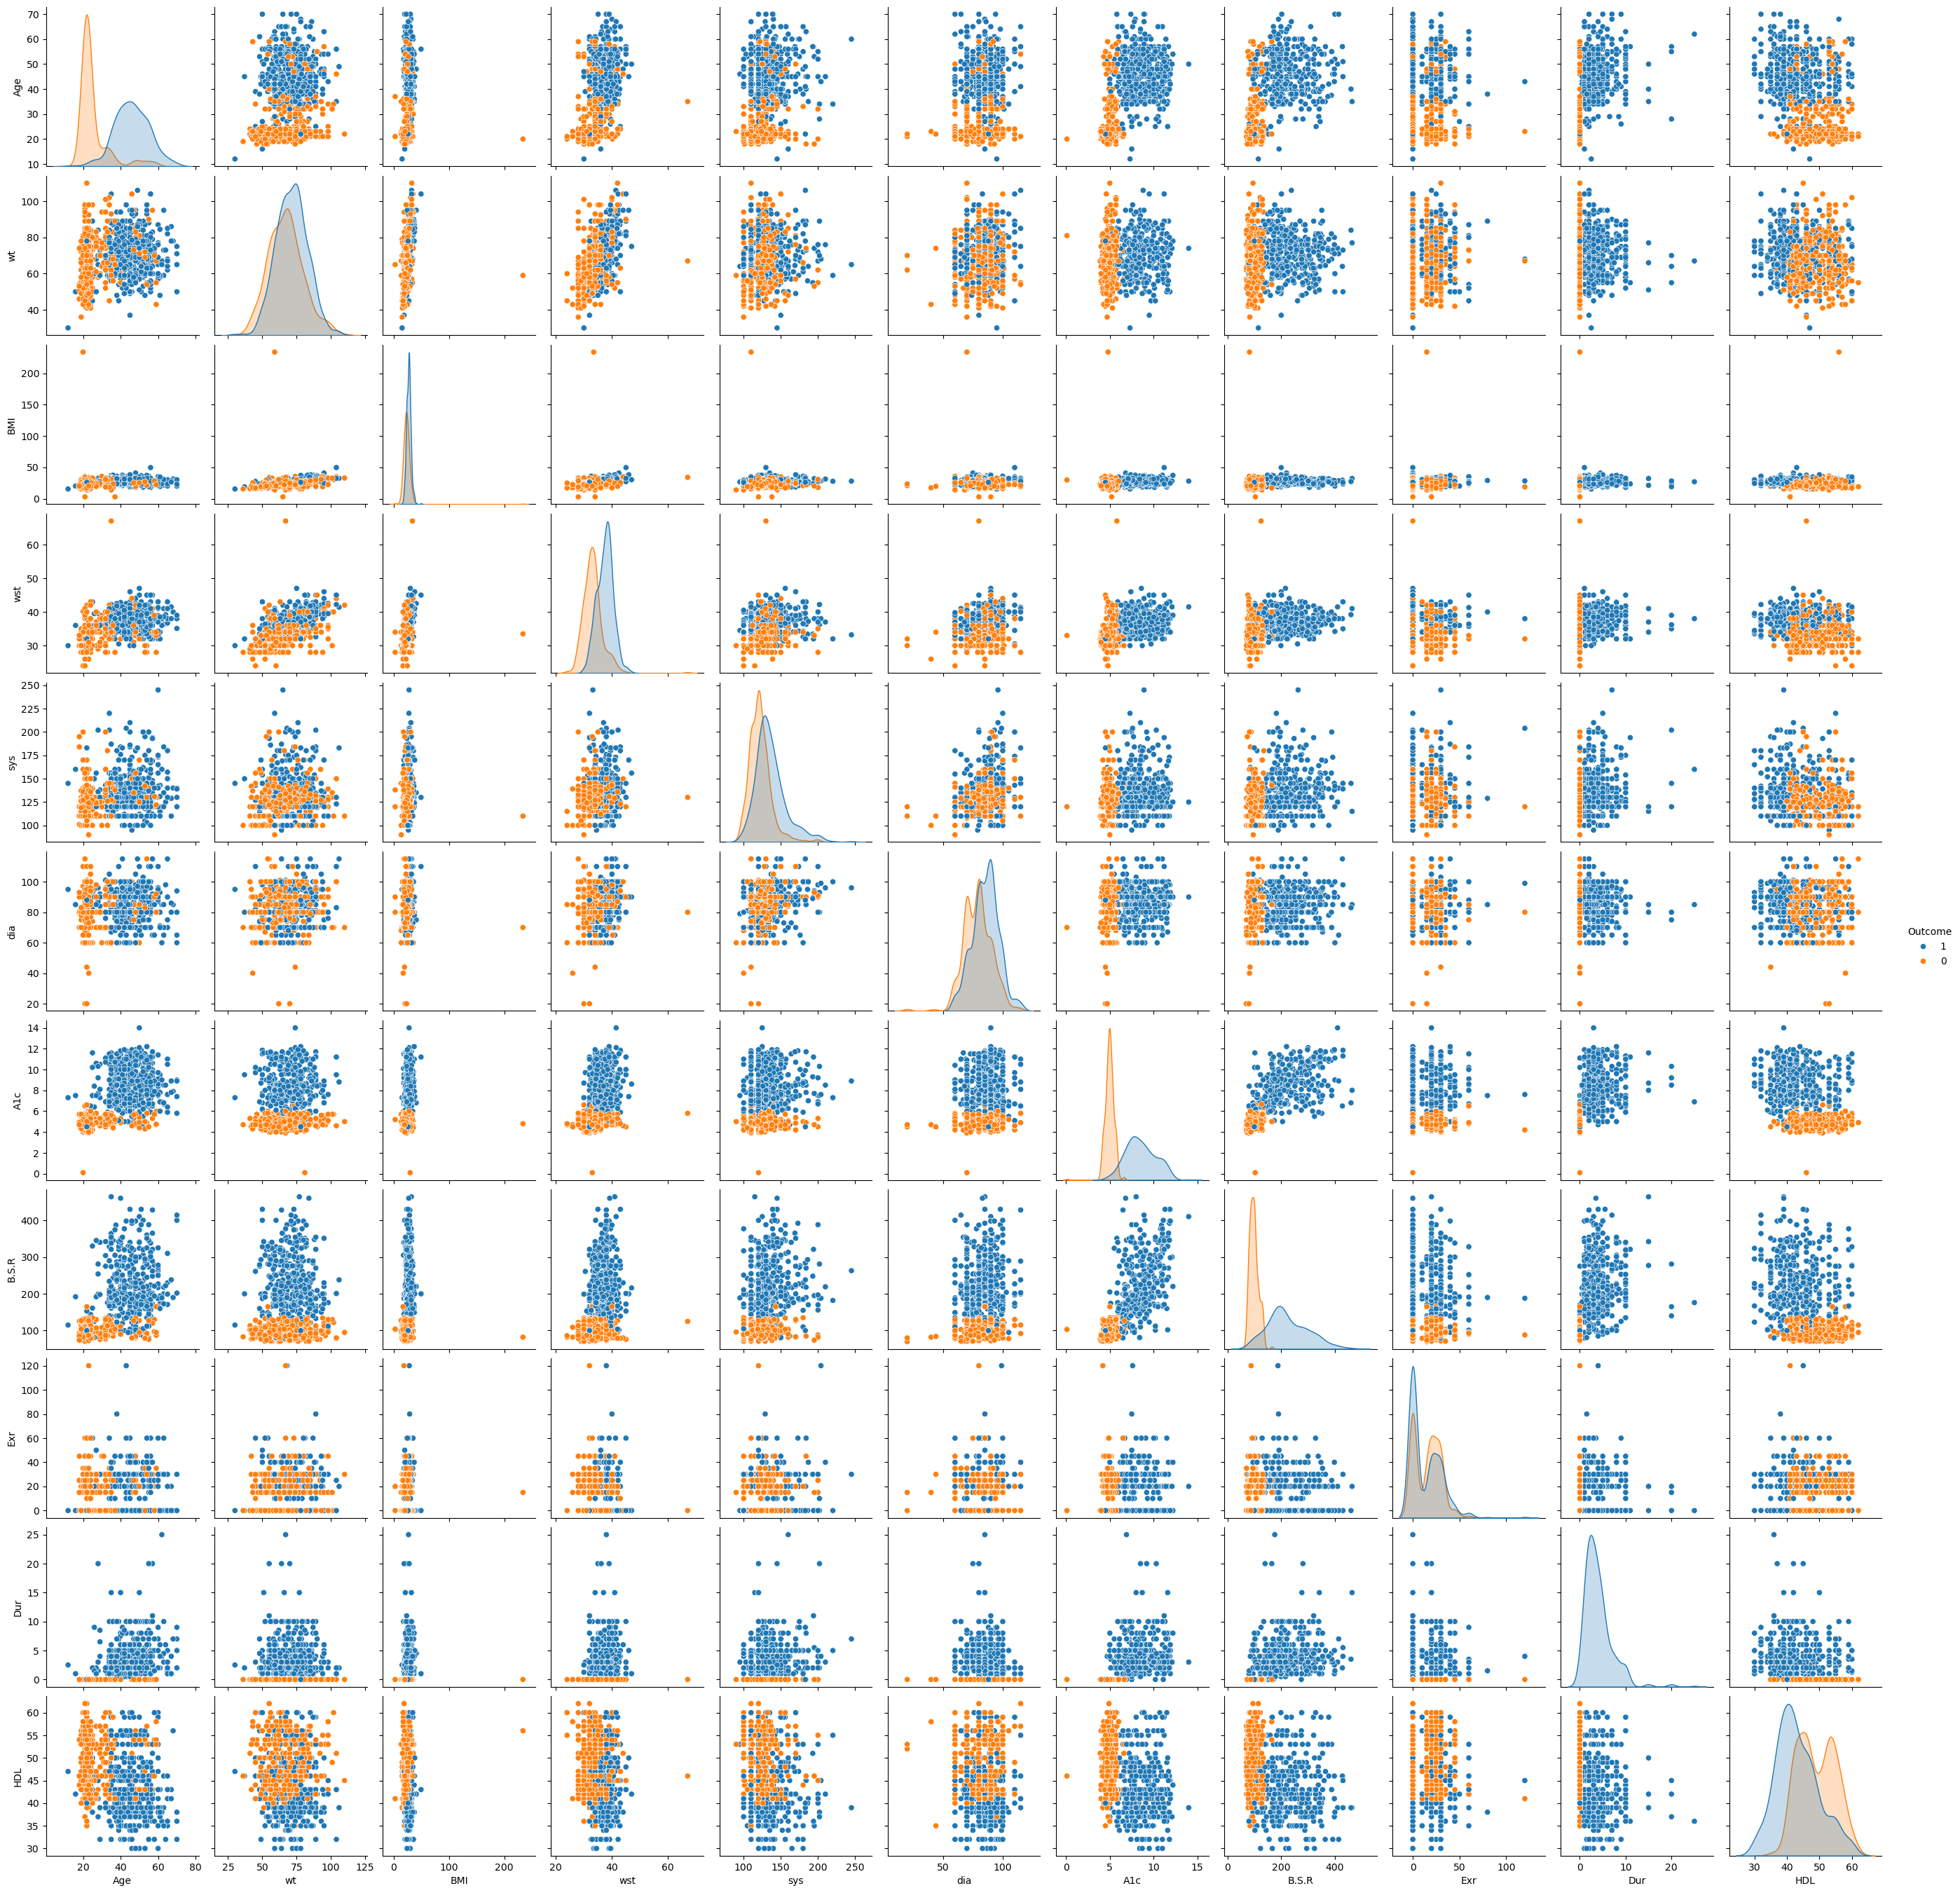

In [11]:
fig = plt.figure(figsize=(25, 5))
sns.pairplot(df, hue='Outcome', diag_kind='kde')

In [12]:
fig = px.scatter(df, x='HDL', y='BMI', color='Outcome')
fig.show()

C:\Users\abdul\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<AxesSubplot:>

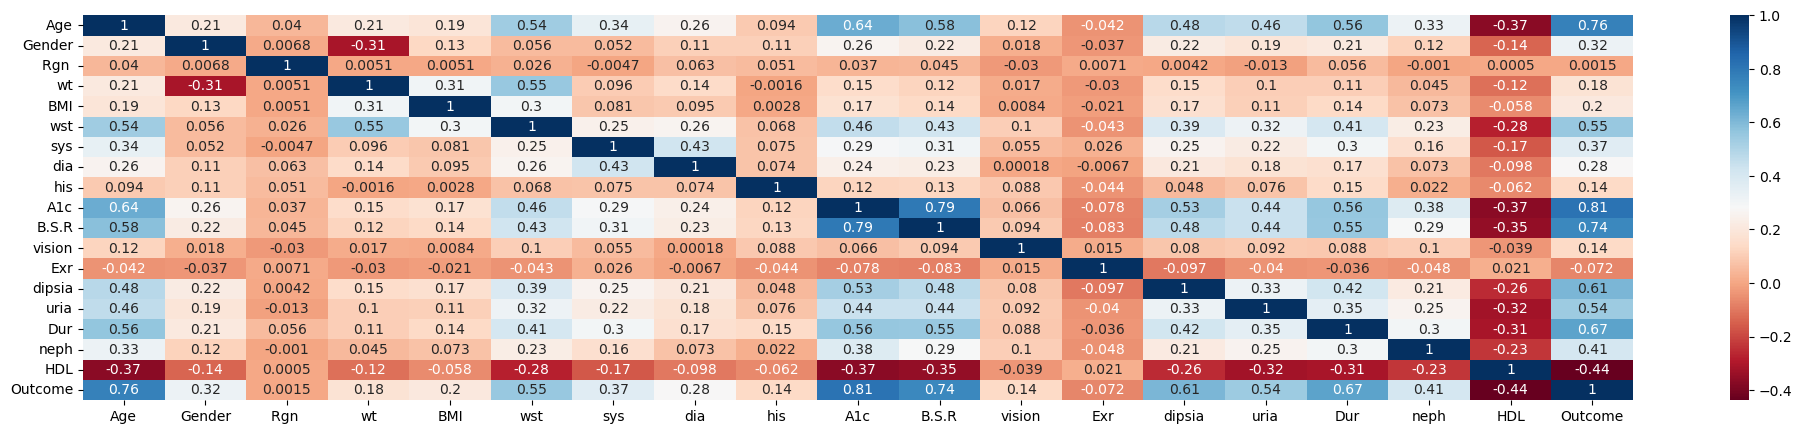

In [13]:
plt.figure(figsize=(25, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

In [14]:
df.isnull().sum()

Age        0
Gender     0
Rgn        0
wt         0
BMI        0
wst        0
sys        0
dia        0
his        0
A1c        0
B.S.R      0
vision     0
Exr        0
dipsia     0
uria       0
Dur        0
neph       0
HDL        0
Outcome    0
dtype: int64

In [15]:
df.pivot_table(columns='Outcome', values=['BMI', 'A1c'], aggfunc='mean')

Outcome          0          1
A1c       4.956901   8.528004
BMI      23.825249  27.208498

<AxesSubplot:>

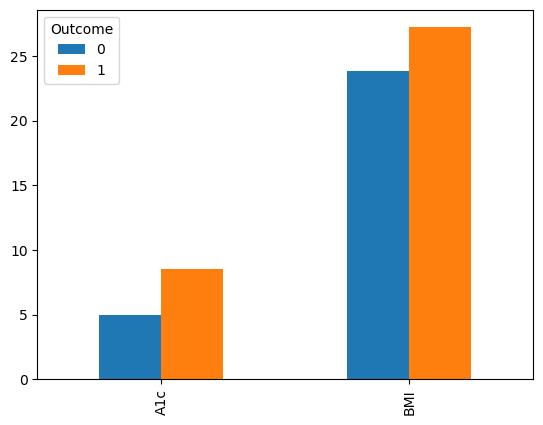

In [16]:
df.pivot_table(columns='Outcome', values=['BMI', 'A1c'], aggfunc='mean').plot(kind='bar')

uria          0          1
A1c    6.181811   8.250167
BMI   24.991250  26.933946


<AxesSubplot:>

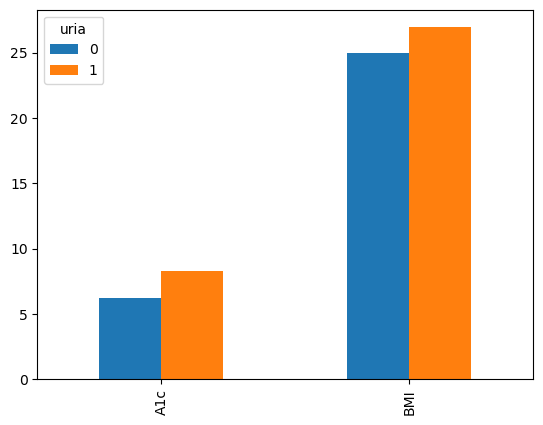

In [17]:
print(df.pivot_table(columns='uria', values=['BMI', 'A1c'], aggfunc='mean'))
df.pivot_table(columns='uria', values=['BMI', 'A1c'], aggfunc='mean').plot(kind='bar')

In [18]:
df.pivot_table(columns='vision', values='A1c', aggfunc=['sum', 'mean'])

sum               mean          
vision        0        1         0         1
A1c     3130.51  3125.74  6.717833  7.008386

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Outcome', axis=1)

In [21]:
Y = df.Outcome

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=32, shuffle=True)

In [23]:
x_train

Age Gender Rgn     wt    BMI   wst  sys  dia his    A1c  B.S.R vision  \
713  57.0      0    0  72.0  23.50  36.0  112   85   0   7.55    198      1   
277  40.0      0    0  70.0  23.46  34.5  143   90   0   7.50    187      0   
579  22.0      1    1  57.0  25.20  29.5  101   90   1   5.10    102      0   
556  22.0      0    0  68.0  17.83  30.0  118   70   0   5.30    123      0   
725  45.0      1    0  89.0  27.96  34.3  120   96   1   6.00     95      1   
..    ...    ...  ...   ...    ...   ...  ...  ...  ..    ...    ...    ...   
892  22.0      0    0  85.0  28.49  28.0  133   79   0   5.20     93      1   
310  25.0      1    0  45.0  27.50  32.2  127   82   1  10.20    101      1   
901  24.0      0    0  55.0  19.57  42.0  136   87   0   5.30     79      0   
555  21.0      0    0  80.0  19.60  34.0  110   74   0   4.40     92      1   
727  40.0      0    1  59.0  22.79  34.0  150   80   1  10.50    205      0   

     Exr dipsia uria  Dur neph  HDL  
713    0      0    0  2.5    0   53  
277   20      0    1  3.0    1   46  
579    0      0    0  0.0    0   45  
556   30      0    0  0.0    0   57  
725    0      1    0  6.0    0   49  
..   ...    ...  ...  ...  ...  ...  
892   30      0    0  0.0    0   50  
310   60      1    1  0.0    1   50  
901   20      0    0  0.0    0   56  
555   20      0    0  0.0    0   51  
727    0      1    0  2.5    0   56  

[638 rows x 18 columns]

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.svm import SVC

In [27]:
rfc = RandomForestClassifier()

In [28]:
svc = SVC()

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(x_train, y_train)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [31]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
svc.fit(x_train, y_train)

SVC()

In [33]:
pred_lr = lr.predict(x_test)

In [34]:
pred_rfc = rfc.predict(x_test)

In [35]:
pred_svc = svc.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score

In [37]:
print('Classification Matrix of Logistic Regression: ')

Classification Matrix of Logistic Regression: 


In [38]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       119
           1       0.99      0.98      0.99       155

    accuracy                           0.99       274
   macro avg       0.98      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



In [39]:
print('Classification Matrix of Random Forest: ')

Classification Matrix of Random Forest: 


In [40]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       119
           1       0.99      0.99      0.99       155

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



In [41]:
print('Classification Matrix of SVM: ')

Classification Matrix of SVM: 


In [42]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       119
           1       0.98      0.91      0.94       155

    accuracy                           0.94       274
   macro avg       0.94      0.94      0.94       274
weighted avg       0.94      0.94      0.94       274



In [43]:
accuracy_scores = [
    {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test, pred_rfc)},
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, pred_lr)},
    {'Model': 'SVM', 'Accuracy Score': accuracy_score(y_test, pred_svc)},
]

In [44]:
accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)

In [45]:
accuracy_df.head()

Model  Accuracy Score
0        Random Forest        0.989051
1  Logistic Regression        0.985401
2                  SVM        0.937956

<AxesSubplot:>

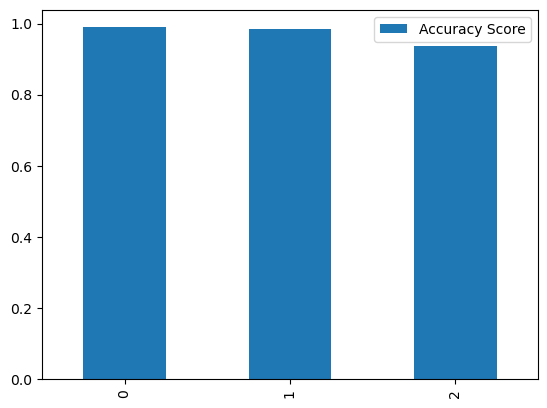

In [46]:
accuracy_df.plot(kind='bar')

# For testing:

In [47]:
x_train.iloc[0].values


array([57.0, '0', '0', 72.0, 23.5, 36.0, 112, 85, '0', 7.55, 198, '1', 0,
       '0', '0', 2.5, '0', 53], dtype=object)

In [48]:
y_train.iloc[0]


'1'

In [49]:
rfc.predict([[57.0,0,0,72.0,23.50,36.0,112,85,0,7.55,198,1,0,0,0,2.5,0,53]])

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['1'], dtype=object)

In [50]:
svc.predict([[57.0,0,0,72.0,23.50,36.0,112,85,0,7.55,198,1,0,0,0,2.5,0,53]])

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array(['1'], dtype=object)

In [51]:
lr.predict([[57.0,0,0,72.0,23.50,36.0,112,85,0,7.55,198,1,0,0,0,2.5,0,53]])

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array(['1'], dtype=object)

In [52]:
import joblib as jb

In [53]:
jb.dump(rfc, 'diabetes_rfc.pkl')

['diabetes_rfc.pkl']

In [54]:
# Done